In [1]:
import yfinance as yf

# Download historical data for a stock (e.g., AAPL)
df = yf.download("AAPL", start="2022-01-01", end="2023-12-31")

# Reset index for easier manipulation
df.reset_index(inplace=True)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
print(df.head())

Price        Date       Close        High         Low        Open     Volume
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL
0      2022-01-03  178.645660  179.499589  174.425155  174.542932  104487900
1      2022-01-04  176.378342  179.558457  175.809061  179.254190   99310400
2      2022-01-05  171.686722  176.839679  171.411899  176.290033   94537600
3      2022-01-06  168.820679  172.059683  168.467333  169.507737   96904000
4      2022-01-07  168.987534  170.921120  167.868606  169.694226   86709100


In [6]:
# Install ta if not already installed
%pip install ta

from ta.trend import SMAIndicator, EMAIndicator

# Use the correct column name for 'Close'
close_col = ('Close', 'AAPL')

df['SMA_20'] = SMAIndicator(close=df[close_col], window=20).sma_indicator()
df['EMA_20'] = EMAIndicator(close=df[close_col], window=20).ema_indicator()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from ta.momentum import RSIIndicator

df['RSI'] = RSIIndicator(close=df[close_col], window=14).rsi()


In [14]:
from ta.trend import MACD

macd = MACD(close=df[close_col], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()
df['MACD_hist'] = macd.macd_diff()


In [16]:
import yfinance as yf

stock = yf.Ticker("AAPL")
info = stock.info

# Example: Get PE ratio, EPS, etc.
print("PE Ratio:", info.get("trailingPE"))
print("EPS:", info.get("trailingEps"))
print("Market Cap:", info.get("marketCap"))


PE Ratio: 31.591902
EPS: 6.42
Market Cap: 3029278916608


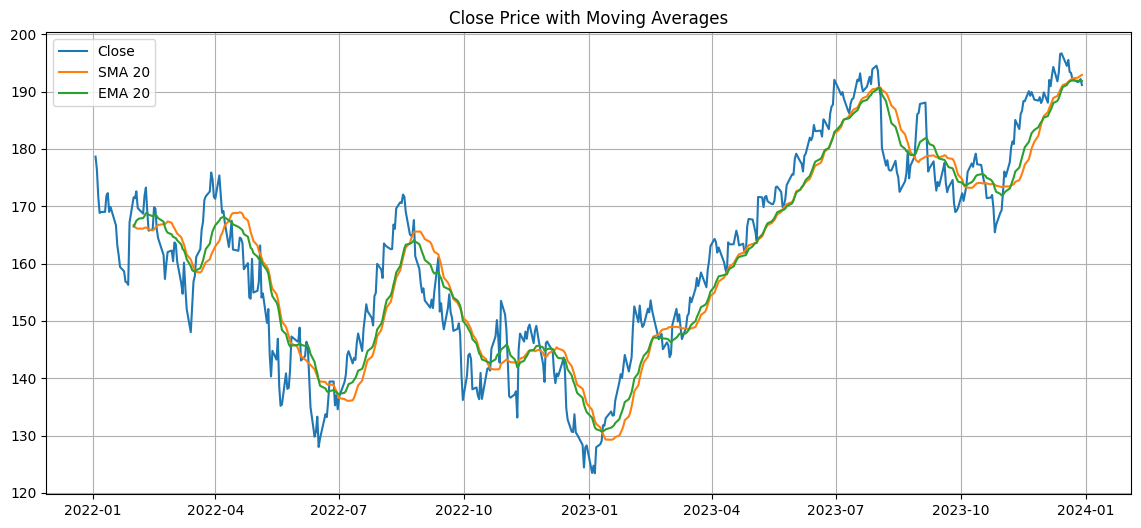

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['EMA_20'], label='EMA 20')
plt.title('Close Price with Moving Averages')
plt.legend()
plt.grid()
plt.show()


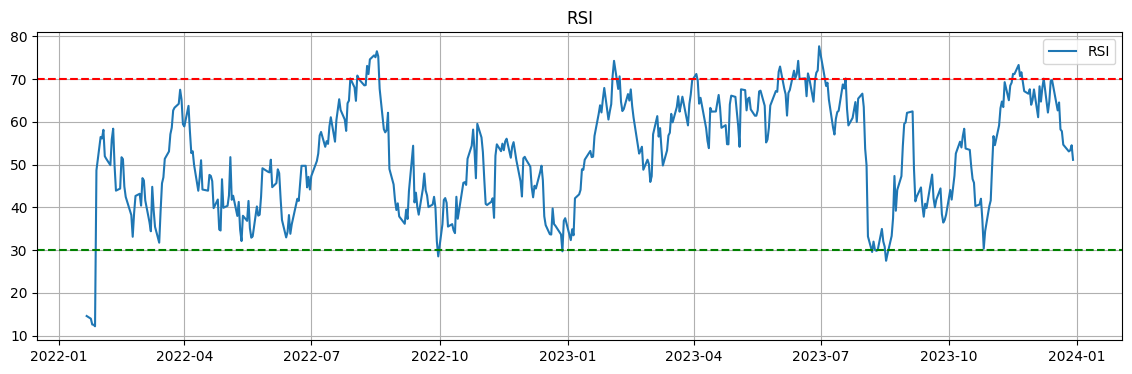

In [18]:
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.legend()
plt.grid()
plt.show()


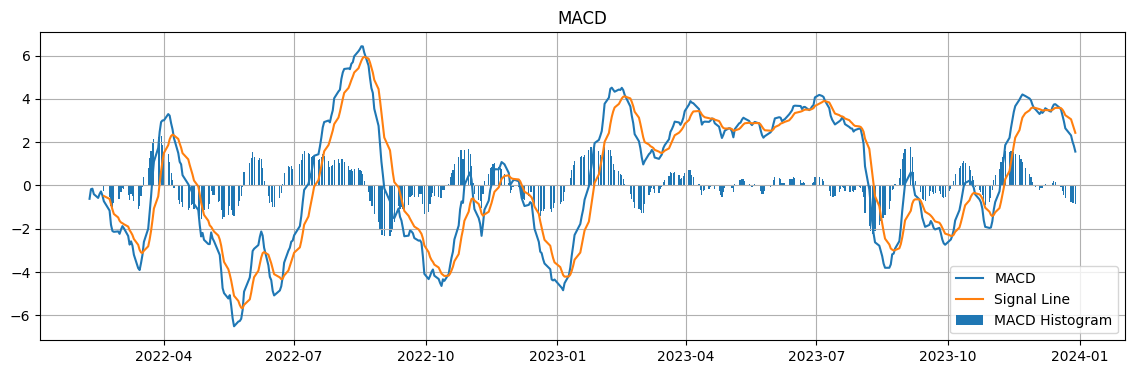

In [19]:
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.plot(df['Date'], df['MACD_signal'], label='Signal Line')
plt.bar(df['Date'], df['MACD_hist'], label='MACD Histogram')
plt.title('MACD')
plt.legend()
plt.grid()
plt.show()
